Using device: cuda
Using device: cuda
Using device: cuda
Loading data...


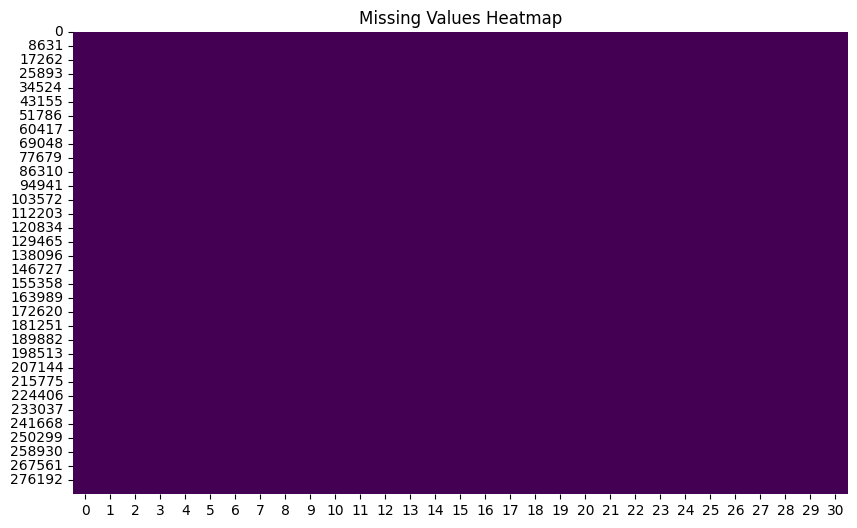

Class distribution before imputing missing values and scaling:
0    284315
1       492
Name: count, dtype: int64
Class distribution after aligning X and y:
0    284315
1       492
Name: count, dtype: int64


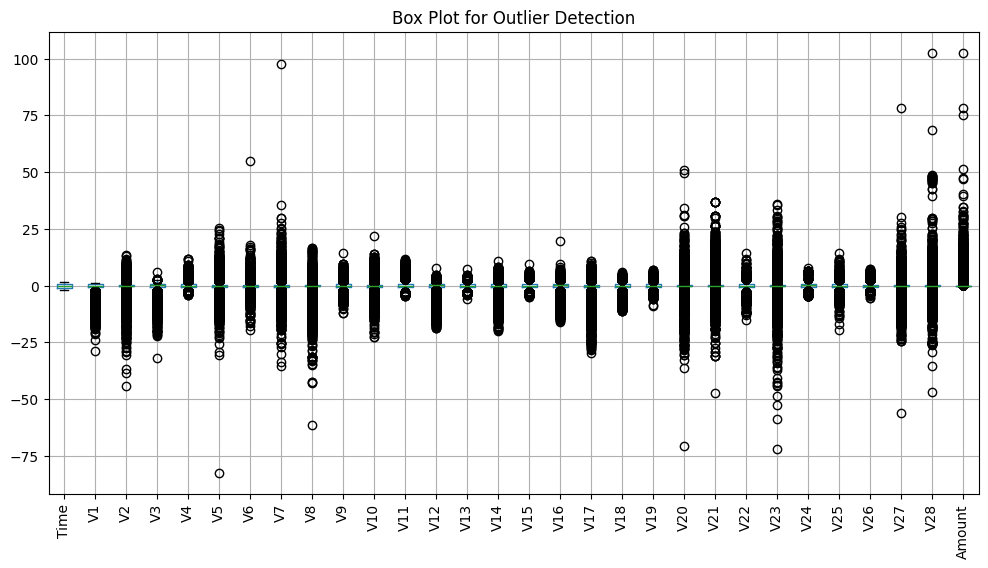

File 'C:\Users\mbpd1\downloads\upgrad\capstone\FindDefault\data\processed\preprocessed_data.csv' already exists. Overwriting...
Preprocessed data saved to C:\Users\mbpd1\downloads\upgrad\capstone\FindDefault\data\processed\preprocessed_data.csv
Performing EDA...
Performing EDA on the dataset.

--- Dataset Overview ---
Shape of the dataset: (284807, 31)

--- Data Types ---
0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
dtype: object

--- Checking for Missing Values ---
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17  

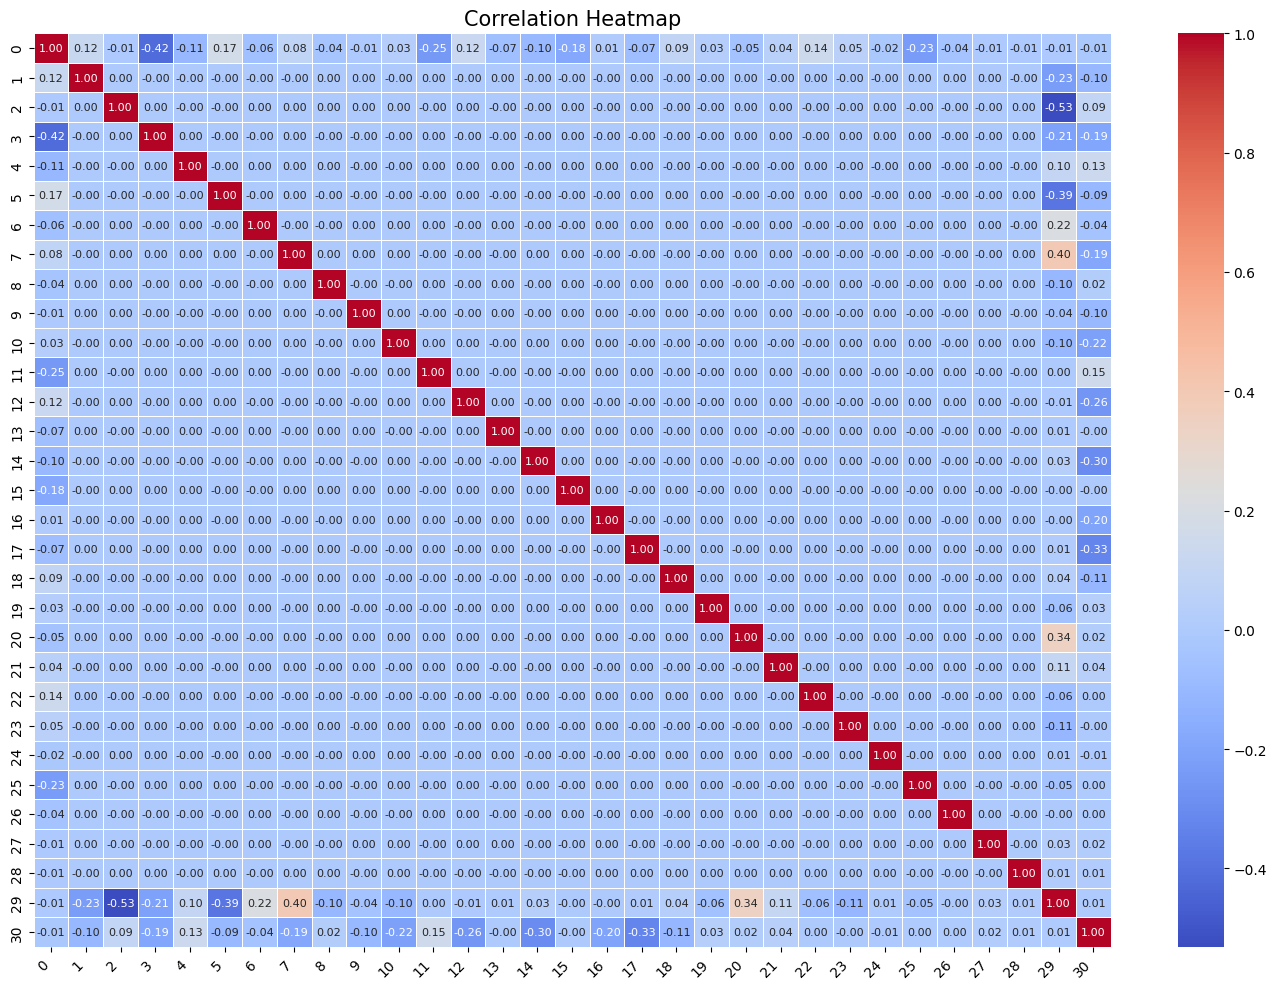

Cleaned data saved to C:\Users\mbpd1\downloads\upgrad\capstone\FindDefault\data\processed
Building new features...
Dropping columns with NaN or Infinity values: []
Original dataset shape: (284807, 30), (284807,)
Resampled dataset shape: (568630, 29), (568630,)
Feature-engineered data saved to C:\Users\mbpd1\downloads\upgrad\capstone\FindDefault\data\processed\X_features_resampled.csv
Resampled target data saved to C:\Users\mbpd1\downloads\upgrad\capstone\FindDefault\data\processed\y_resampled.csv
Training the Logistic Regression model...
Training with learning rate: 0.001, epochs: 150, regularization: l1, lambda: 0.01
Epoch [10/150], Loss: 2.6007
Epoch [20/150], Loss: 1.8633
Epoch [30/150], Loss: 1.4433
Epoch [40/150], Loss: 1.3873
Epoch [50/150], Loss: 1.3632
Epoch [60/150], Loss: 1.3460
Epoch [70/150], Loss: 1.3315
Epoch [80/150], Loss: 1.3203
Epoch [90/150], Loss: 1.3088
Epoch [100/150], Loss: 1.1801
Epoch [110/150], Loss: 1.0002
Epoch [120/150], Loss: 0.8375
Epoch [130/150], Loss: 

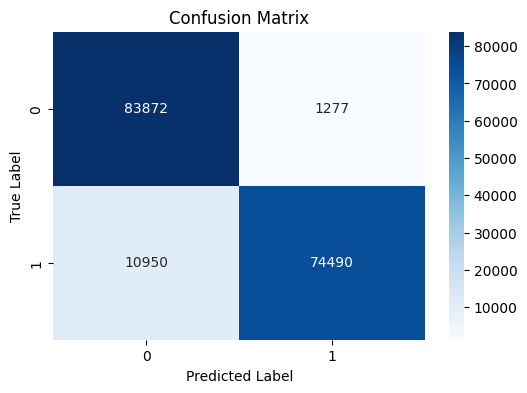

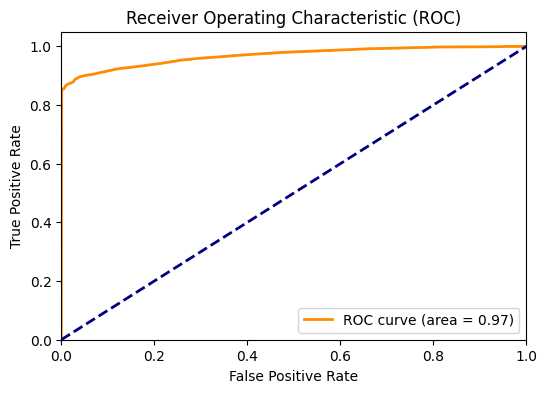

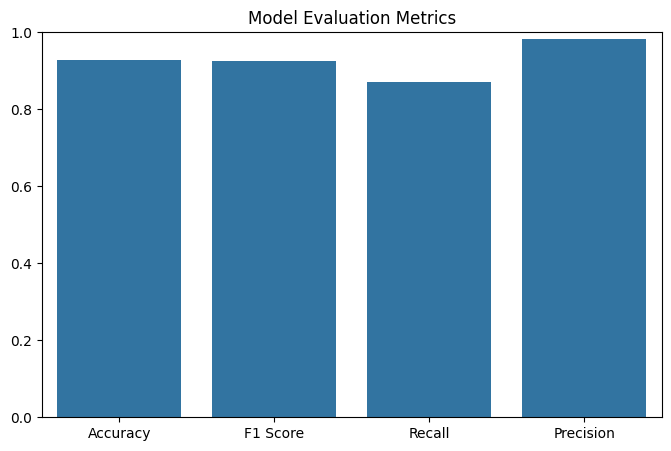

Model training and evaluation completed.


In [1]:
import sys
import pandas as pd

# Add the directory containing train_model.py and other modules to the system path
sys.path.append(r'C:/Users/mbpd1/Downloads/upgrad/capstone/FindDefault/src/models/')
sys.path.append(r'C:/Users/mbpd1/Downloads/upgrad/capstone/FindDefault/src/features')
sys.path.append(r'C:/Users/mbpd1/Downloads/upgrad/capstone/FindDefault/src/data/')
model_results_path_logreg = r'C:\Users\mbpd1\downloads\upgrad\capstone\FindDefault\models\logreg_model_results.pdf'
model_save_path_lgr = r'C:\Users\mbpd1\downloads\upgrad\capstone\FindDefault\models\best_lgr_model.pkl'

# Import necessary functions from the respective scripts
from train_model import load_feature_engineered_data, train_logistic_regression_torch
from build_features import load_preprocessed_data, build_features
from load_data import perform_eda, preprocess_data


def main():
    # Step 1: Load data from Excel file
    print("Loading data...")
    data_path = r'C:\Users\mbpd1\downloads\upgrad\capstone\FindDefault\data\raw\creditcard.csv'
    data_path_cl = r'C:\Users\mbpd1\downloads\upgrad\capstone\FindDefault\data\processed\cleaned_data.csv'
    
    # Load the data into a DataFrame
    data = pd.read_csv(data_path)
    
    # Preprocess the data
    X_scaled, y, preprocessed_data = preprocess_data(data_path_cl)

    # Step 2: Perform EDA on the preprocessed data
    print("Performing EDA...")
    perform_eda(data_path)
    X_scaled, y = load_preprocessed_data()
    
    print("Building new features...")
    X_resampled, y_resampled = build_features(X_scaled, y)

     # Step 4: Train Logistic Regression model
    print("Training the Logistic Regression model...")
    param_distributions = {'lr': [0.001, 0.01, 0.1], 'num_epochs': [150, 300, 600]}
    regularization = 'l1'  # or 'l2' or None
    reg_lambda = 0.01

    y_pred_test = train_logistic_regression_torch(X_resampled, y_resampled, param_distributions=param_distributions, n_iter=5, regularization=regularization, reg_lambda=reg_lambda, model_save_path=model_save_path_lgr)
    print("Model training and evaluation completed.")
    
if __name__ == "__main__":
    main()